# Creating a Bipartite Graph

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import math
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_excel(r'D:\Notes\VI SEM\SNA\Source Data.xlsx')
df3 = pd.DataFrame(df,columns=['Age','Who motivates you to workout?'])
df.head(5)
#print (df3)

,Name,Gender,Age,How important is workout to you?,What form(s) of physical activity do you currently participate in?,How often do you workout?,What motivates you to workout?,Who motivates you to workout?,Friend 1,How many hours do you sleep in a day?,Do you follow any kind of diet?,What way do you prefer to workout?,How happy/sad were you on the day of workout?,How much were you able to concentrate on your daily activities after workout?
0,Medha S Shettar,Female,21-25,4,Playing,Rarely,To become fit,Family,NaN,5,No,opt for classes/fitness centers by paying,4,4
1,Pramila,Female,18-20,5,"Walking, Gym, Dance",Frequently,To become fit,Friends,NaN,6,Yes,opt for classes/fitness centers by paying,5,5
2,Ritika Das,Female,21-25,4,"Walking, Running",1-2 times a week,To loose Weight,Family,NaN,6,No,On your own,4,4
3,Manjunath Suresh,Male,18-20,4,"Walking, Running, Gym",1-2 times a week,you enjoy doing it,Friends,NaN,7,Yes,opt for classes/fitness centers by paying,4,4
4,Pratibha,Female,31-35,3,"Walking, Yoga",Rarely,To release stress,Family,NaN,7,No,On your own,4,2


In [3]:
G = nx.Graph()
for i in range(len(df3)) :
     G.add_node(df3.loc[i, "Who motivates you to workout?"])  

for i in range(len(df3)) :
    G.add_node(df3.loc[i, "Age"])
    
for i in range(len(df3)):
    G.add_edge(df3.loc[i, "Who motivates you to workout?"],df3.loc[i, "Age"])


In [4]:
Motivates_Age = nx.from_pandas_edgelist(df,source="Who motivates you to workout?",target="Age")

In [5]:
pos = {}
Groups ={}
Age = {}
for x in df["Who motivates you to workout?"]:
  if x in Groups:
    Groups[x]+=1
  else:
    Groups[x]=1
    pos[x]=(10,(len(Groups)+1)*10)
for x in df["Age"]:
  if x in Age:
    Age[x]+=1
  else:
    Age[x]=1
    pos[x]=(20,(len(Age)+1)*10+15)
print(pos)

{'Family': (10, 20), 'Friends': (10, 30), 'Self Motivated': (10, 40), 'Celebrities': (10, 50), 'None': (10, 60), 'Politicians': (10, 70), 'Colleagues': (10, 80), '21-25': (20, 35), '18-20': (20, 45), '31-35': (20, 55), '26-30': (20, 65), '50-55': (20, 75), '55 +': (20, 85), '46-50': (20, 95), '< 18': (20, 105)}


C:\Users\Aishwarya\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


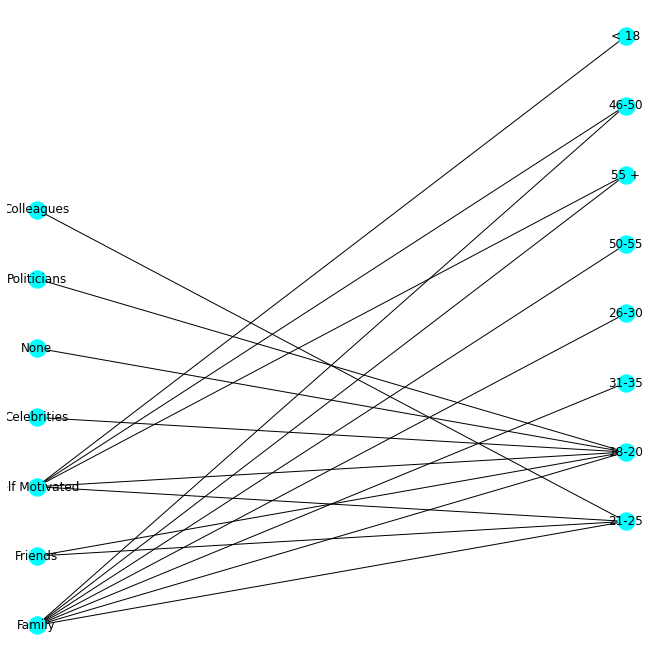

In [6]:
plt.figure(figsize=(9,9))
nx.draw(Motivates_Age,with_labels=True,node_color='aqua',pos=pos)
plt.show()

In [7]:
print(nx.info(G))
print(nx.is_directed(G))

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 18
Average degree:   2.4000
False


In [8]:
print('Degree Centrality:',nx.degree_centrality(G))
diction1 = nx.degree_centrality(G)
keymax = max(diction1, key=diction1.get)
print ('Max Degree Centrality Value:',keymax)

Degree Centrality: {'Family': 0.5, 'Friends': 0.14285714285714285, 'Self Motivated': 0.3571428571428571, 'Celebrities': 0.07142857142857142, 'None': 0.07142857142857142, 'Politicians': 0.07142857142857142, 'Colleagues': 0.07142857142857142, '21-25': 0.2857142857142857, '18-20': 0.42857142857142855, '31-35': 0.07142857142857142, '26-30': 0.07142857142857142, '50-55': 0.07142857142857142, '55 +': 0.14285714285714285, '46-50': 0.14285714285714285, '< 18': 0.07142857142857142}
Max Degree Centrality Value: Family


In [9]:
print('Density of the graph is:',nx.density(G))

Density of the graph is: 0.17142857142857143


In [10]:
print("Clustering:", nx.clustering(G).items())
print('Average Clustering is:',nx.average_clustering(G))

Clustering: dict_items([('Family', 0), ('Friends', 0), ('Self Motivated', 0), ('Celebrities', 0), ('None', 0), ('Politicians', 0), ('Colleagues', 0), ('21-25', 0), ('18-20', 0), ('31-35', 0), ('26-30', 0), ('50-55', 0), ('55 +', 0), ('46-50', 0), ('< 18', 0)])
Average Clustering is: 0.0


In [11]:
print('Diameter of the network:',nx.degree(G))
diction2 = dict(nx.degree(G))
keymax2 = max(diction1, key=diction2.get)
print('Maximum Diameter:',keymax2)

Diameter of the network: [('Family', 7), ('Friends', 2), ('Self Motivated', 5), ('Celebrities', 1), ('None', 1), ('Politicians', 1), ('Colleagues', 1), ('21-25', 4), ('18-20', 6), ('31-35', 1), ('26-30', 1), ('50-55', 1), ('55 +', 2), ('46-50', 2), ('< 18', 1)]
Maximum Diameter: Family
